In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from scipy import stats

In [75]:
from platform import python_version
print(python_version())

3.9.13


In [76]:
dataset = pd.read_csv('titanic.csv')
dataset = dataset.rename(
    columns={
        'PassengerId': 'Пассажиры',
        'Survived': 'Выжившие',
        'Pclass': 'Класс',
        'Name': 'Имя',
        'Sex': 'Пол',
        'Age': 'Возраст',
        'SibSp': 'Кол-во братьев, сестер и т.д.',
        'Parch': 'Кол-во родителей, детей',
        'Ticket': 'Номер билета',
        'Fare': 'Плата',
        'Cabin': 'Каюта',
        'Embarked': 'Порт посадки'
    }
)
dataset

Пассажиры  Выжившие  Класс  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   
..         ...       ...    ...   
886        887         0      2   
887        888         1      1   
888        889         0      3   
889        890         1      1   
890        891         0      3   

                                                   Имя     Пол  Возраст  \
0                              Braund, Mr. Owen Harris    male     22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female     38.0   
2                               Heikkinen, Miss. Laina  female     26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female     35.0   
4                             Allen, Mr. William Henry    male     35.0   
..                                                 ...     ...      ...   
886                              Montvila, Rev. Juozas    male     27.0   
887                       Graham, Miss. Margaret Edith  female     19.0   
888           Johnston, Miss. Catherine Helen "Carrie"  female      NaN   
889                              Behr, Mr. Karl Howell    male     26.0   
890                                Dooley, Mr. Patrick    male     32.0   

     Кол-во братьев, сестер и т.д.  Кол-во родителей, детей      Номер билета  \
0                                1                        0         A/5 21171   
1                                1                        0          PC 17599   
2                                0                        0  STON/O2. 3101282   
3                                1                        0            113803   
4                                0                        0            373450   
..                             ...                      ...               ...   
886                              0                        0            211536   
887                              0                        0            112053   
888                              1                        2        W./C. 6607   
889                              0                        0            111369   
890                              0                        0            370376   

       Плата Каюта Порт посадки  
0     7.2500   NaN            S  
1    71.2833   C85            C  
2     7.9250   NaN            S  
3    53.1000  C123            S  
4     8.0500   NaN            S  
..       ...   ...          ...  
886  13.0000   NaN            S  
887  30.0000   B42            S  
888  23.4500   NaN            S  
889  30.0000  C148            C  
890   7.7500   NaN            Q  

[891 rows x 12 columns]

In [77]:
dataset.describe()

Пассажиры    Выжившие       Класс     Возраст  \
count  891.000000  891.000000  891.000000  714.000000   
mean   446.000000    0.383838    2.308642   29.699118   
std    257.353842    0.486592    0.836071   14.526497   
min      1.000000    0.000000    1.000000    0.420000   
25%    223.500000    0.000000    2.000000   20.125000   
50%    446.000000    0.000000    3.000000   28.000000   
75%    668.500000    1.000000    3.000000   38.000000   
max    891.000000    1.000000    3.000000   80.000000   

       Кол-во братьев, сестер и т.д.  Кол-во родителей, детей       Плата  
count                     891.000000               891.000000  891.000000  
mean                        0.523008                 0.381594   32.204208  
std                         1.102743                 0.806057   49.693429  
min                         0.000000                 0.000000    0.000000  
25%                         0.000000                 0.000000    7.910400  
50%                         0.000000                 0.000000   14.454200  
75%                         1.000000                 0.000000   31.000000  
max                         8.000000                 6.000000  512.329200

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Пассажиры                      891 non-null    int64  
 1   Выжившие                       891 non-null    int64  
 2   Класс                          891 non-null    int64  
 3   Имя                            891 non-null    object 
 4   Пол                            891 non-null    object 
 5   Возраст                        714 non-null    float64
 6   Кол-во братьев, сестер и т.д.  891 non-null    int64  
 7   Кол-во родителей, детей        891 non-null    int64  
 8   Номер билета                   891 non-null    object 
 9   Плата                          891 non-null    float64
 10  Каюта                          204 non-null    object 
 11  Порт посадки                   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8

Non-Null Count - число непропущенных данных

In [79]:
# для того, чтобы индексы не мешали проверке на уникальность не будем их учитывать
# отбрасываем неуникальные строки
only_unique = dataset[dataset.columns[1:13]].drop_duplicates()

# сравниваем формы старого и нового наборов
print('Размер исходной таблицы: ', dataset[dataset.columns[1:13]].shape)
print('Размер таблицы после удаления дубликатов: ', only_unique.shape)

Размер исходной таблицы:  (891, 11)
Размер таблицы после удаления дубликатов:  (891, 11)


Размеры совпадают - дубликатов нет

<AxesSubplot:>

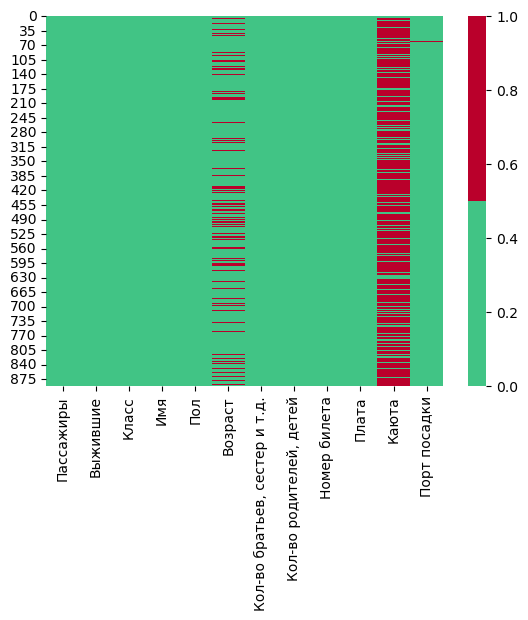

In [80]:
#тепловая карта  на пропущенные данные
colours = ['#41c485', '#ba002b'] # красный - пропущенные данные, зелёный - не пропущенные
sns.heatmap(dataset.isna(), cmap=sns.color_palette(colours))

In [81]:
print("Количество нулевых записей для каждого из столбцов:")
for col in dataset.columns[[1,2,5,6,7,9]]:
    print(f'{col} - {np.count_nonzero(dataset[col] == 0) }')
print("Количество отрицательных записей для каждого из столбцов:")
for col in dataset.columns[[1,2,5,6,7,9]]:
    print(f'{col} - {np.count_nonzero(dataset[col] < 0) }')
print("Количество незначащих записей для каждого из столбцов:")
for col in dataset.columns[:]:
    print(f'{col} - {np.count_nonzero(dataset[col].isna()) }')

Количество нулевых записей для каждого из столбцов:
Выжившие - 549
Класс - 0
Возраст - 0
Кол-во братьев, сестер и т.д. - 608
Кол-во родителей, детей - 678
Плата - 15
Количество отрицательных записей для каждого из столбцов:
Выжившие - 0
Класс - 0
Возраст - 0
Кол-во братьев, сестер и т.д. - 0
Кол-во родителей, детей - 0
Плата - 0
Количество незначащих записей для каждого из столбцов:
Пассажиры - 0
Выжившие - 0
Класс - 0
Имя - 0
Пол - 0
Возраст - 177
Кол-во братьев, сестер и т.д. - 0
Кол-во родителей, детей - 0
Номер билета - 0
Плата - 0
Каюта - 687
Порт посадки - 2


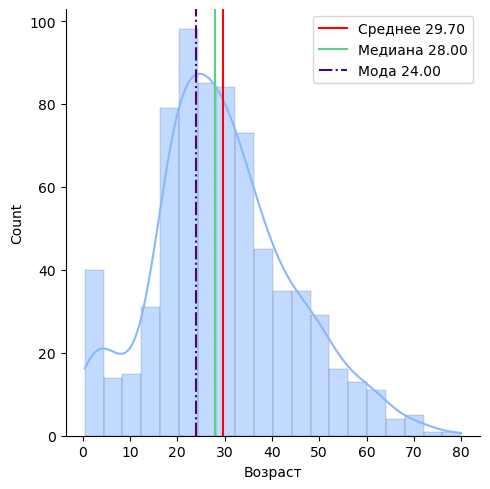

In [82]:
sns.displot(data = dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Возраст'].mean()):.2f}")
plt.axvline(dataset["Возраст"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Возраст'].median():.2f}")
plt.axvline(dataset["Возраст"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()

<AxesSubplot:>

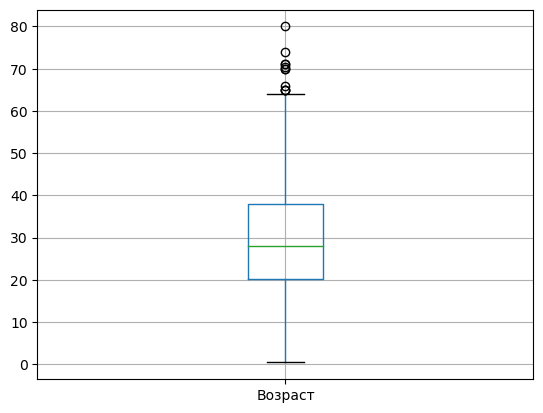

In [83]:
dataset.boxplot("Возраст")

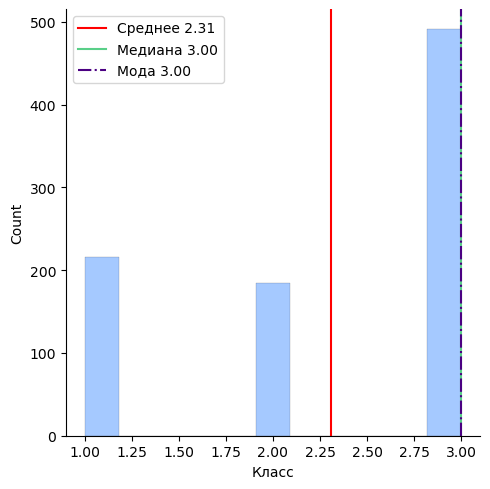

In [84]:
sns.displot(data = dataset, x = "Класс", color = "#87b7ff", linewidth = 0.1)
plt.axvline(dataset["Класс"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Класс'].mean()):.2f}")
plt.axvline(dataset["Класс"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Класс'].median():.2f}")
plt.axvline(dataset["Класс"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Класс'].mode().iloc[0]:.2f}")
plt.legend()

<AxesSubplot:>

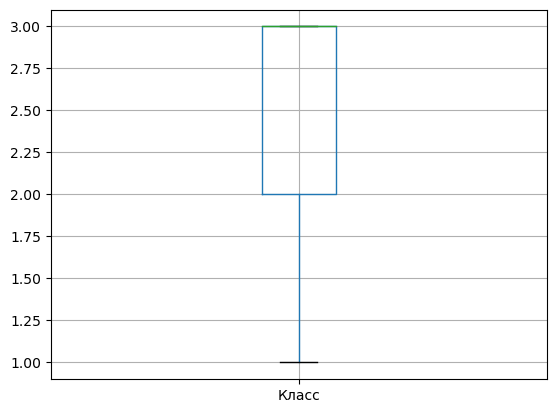

In [85]:
dataset.boxplot("Класс")

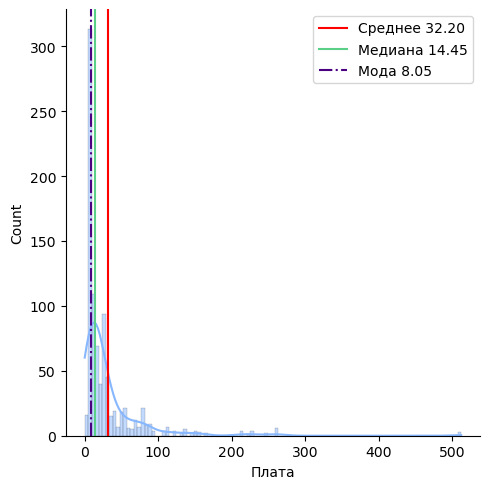

In [86]:
sns.displot(data = dataset, x = "Плата", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Плата"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Плата'].mean()):.2f}")
plt.axvline(dataset["Плата"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Плата'].median():.2f}")
plt.axvline(dataset["Плата"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Плата'].mode().iloc[0]:.2f}")
plt.legend()

<AxesSubplot:>

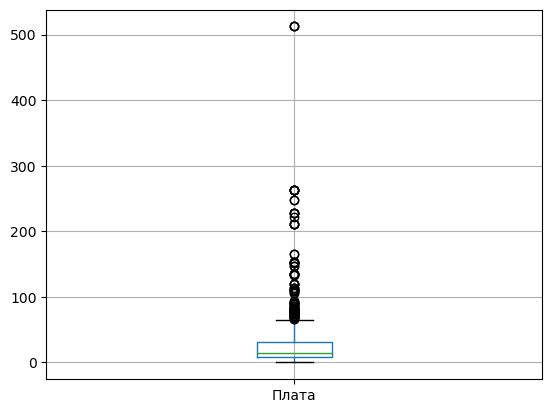

In [87]:
dataset.boxplot("Плата")

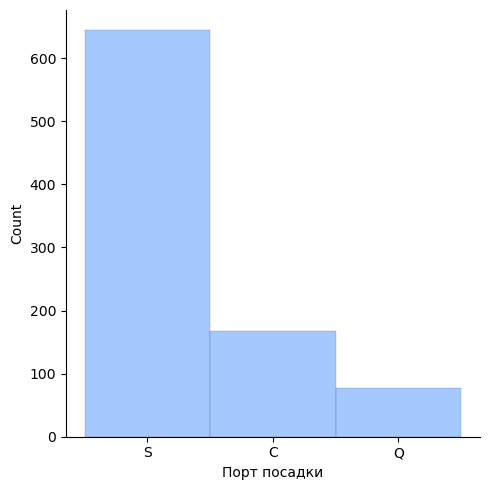

In [88]:
sns.displot(data = dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1)

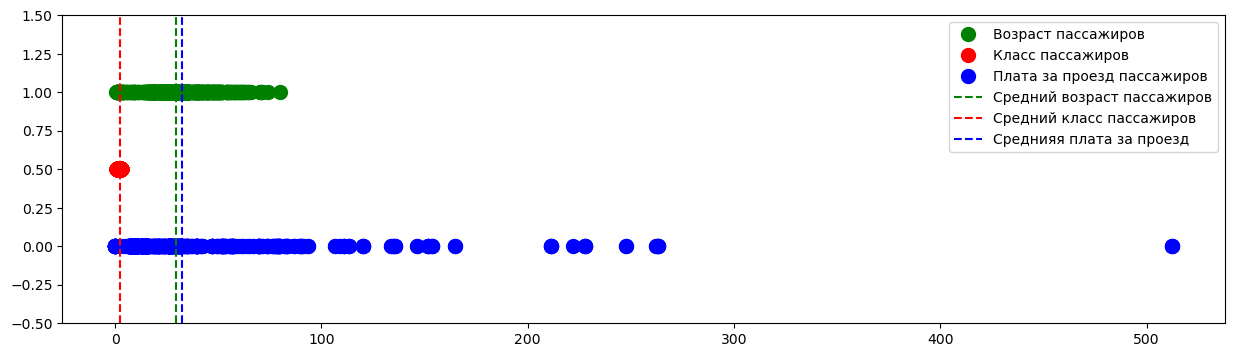

In [89]:
plt.figure(figsize=(15, 4))
plt.ylim(-0.5, 1.5)
plt.plot(dataset["Возраст"], [1 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="g", label="Возраст пассажиров")
plt.plot(dataset["Класс"], [0.5 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="r", label="Класс пассажиров")
plt.plot(dataset["Плата"], [0 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="b", label="Плата за проезд пассажиров")
plt.axvline(dataset["Возраст"].mean(), ls="--", color="g", label="Средний возраст пассажиров")
plt.axvline(dataset["Класс"].mean(), ls="--", color="r", label="Средний класс пассажиров")
plt.axvline(dataset["Плата"].mean(), ls="--", color="b", label="Среднияя плата за проезд")
plt.legend()

<AxesSubplot:>

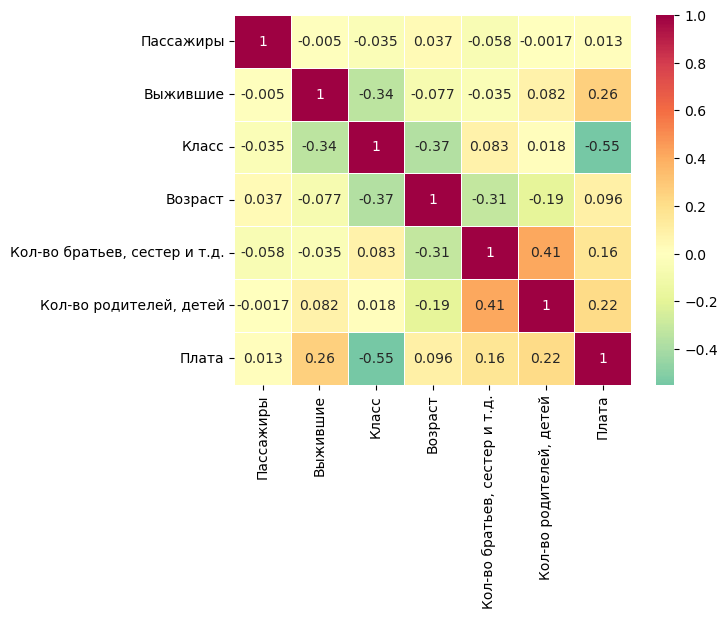

In [90]:
# Тепловая карта корреляции параметров

sns.heatmap(dataset.corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

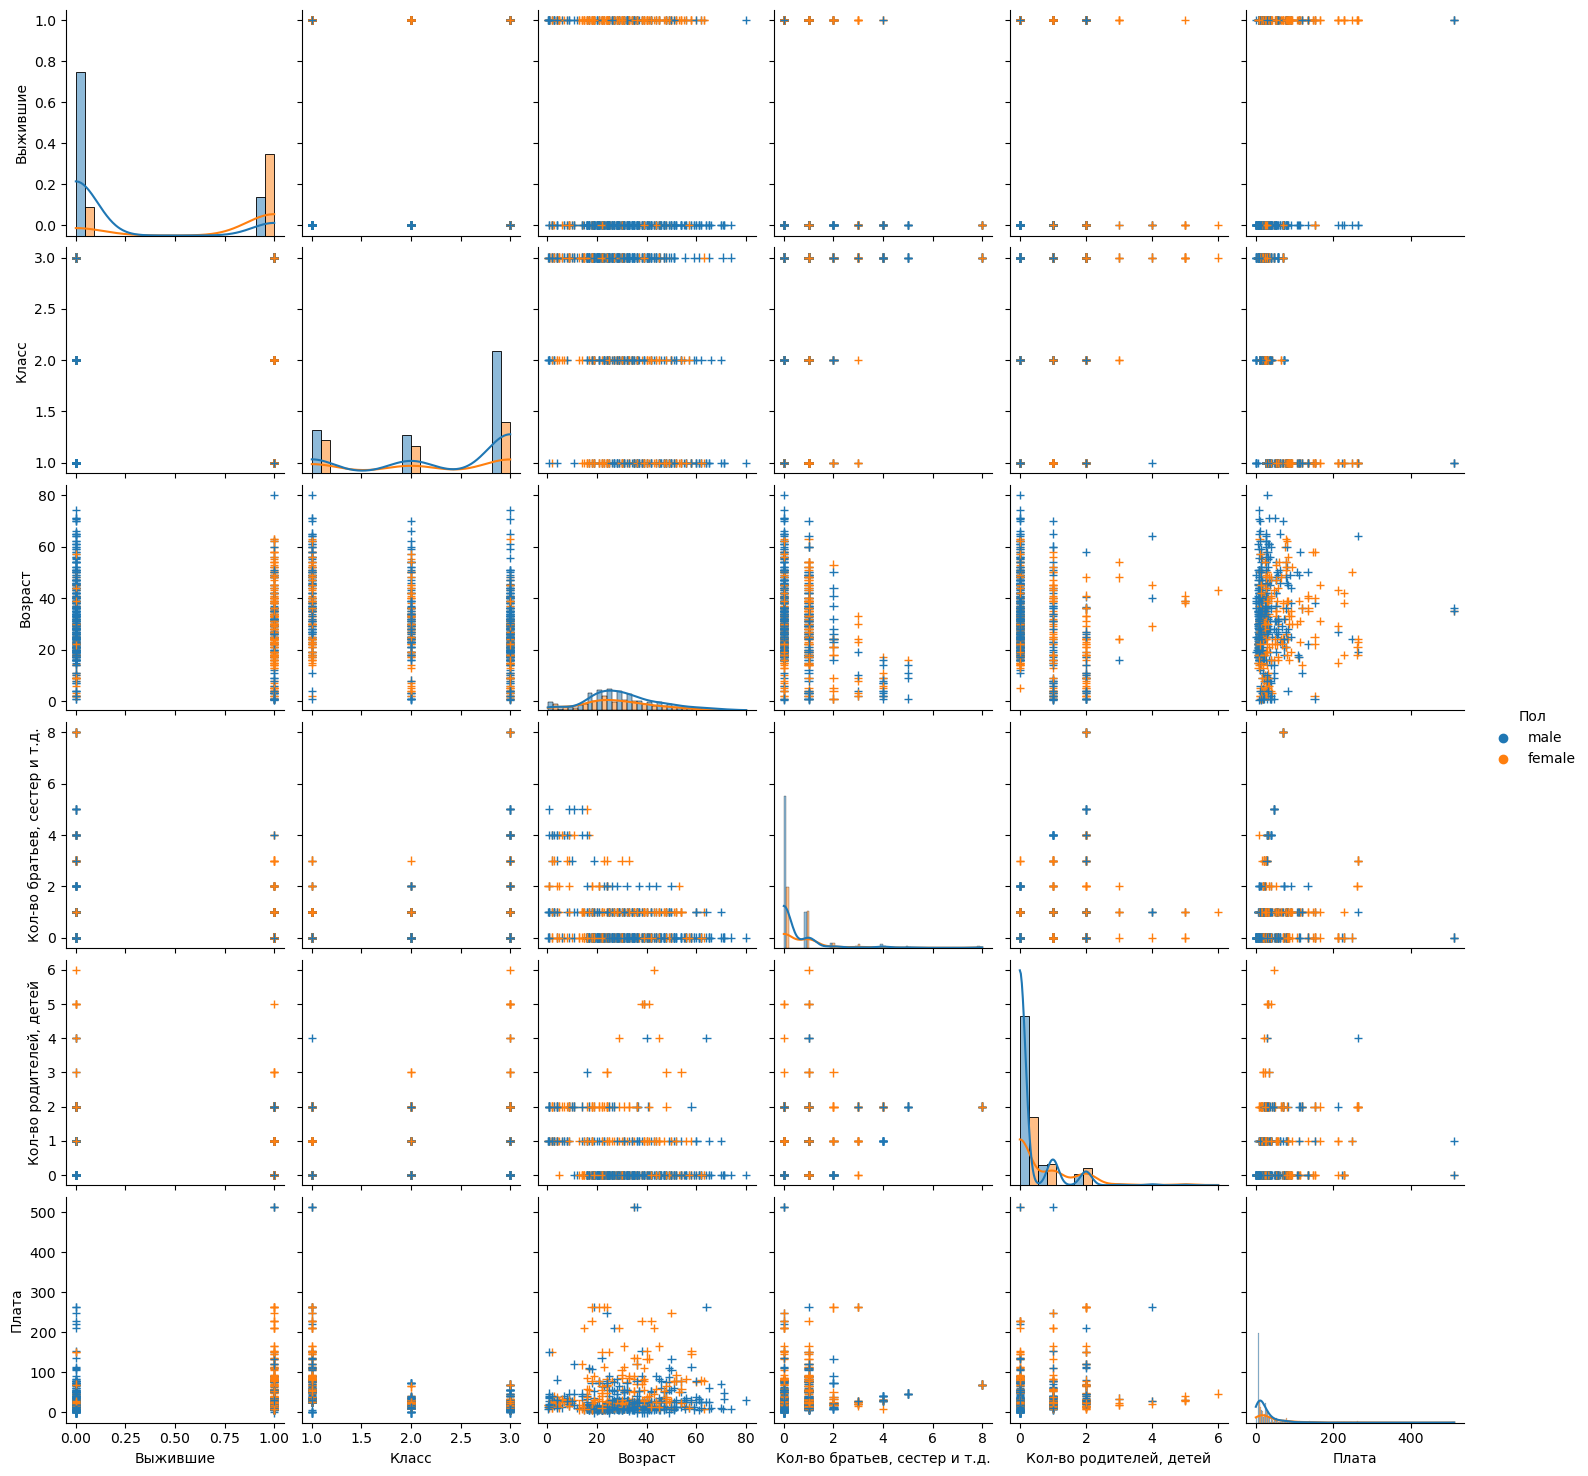

In [91]:
sns.pairplot(data=dataset, vars=dataset.columns[[1,2,5,6,7,9]], hue="Пол",plot_kws=dict(marker="+", linewidth=1), diag_kind="hist", diag_kws=dict(multiple="dodge", kde=True))

Отсечение выбросов и хвостов

In [92]:
filtered_dataset = dataset[(dataset["Плата"] < dataset["Плата"].quantile(0.999)) & (dataset["Плата"] > dataset["Плата"].quantile(0.001))]

In [93]:
filtered_dataset.describe() # обработанные данные

Пассажиры    Выжившие       Класс     Возраст  \
count  873.000000  873.000000  873.000000  704.000000   
mean   444.402062    0.387171    2.319588   29.620980   
std    257.858537    0.487382    0.833526   14.585118   
min      1.000000    0.000000    1.000000    0.420000   
25%    220.000000    0.000000    2.000000   20.000000   
50%    444.000000    0.000000    3.000000   28.000000   
75%    666.000000    1.000000    3.000000   38.000000   
max    891.000000    1.000000    3.000000   80.000000   

       Кол-во братьев, сестер и т.д.  Кол-во родителей, детей       Плата  
count                     873.000000               873.000000  873.000000  
mean                        0.533792                 0.388316   31.107631  
std                         1.111477                 0.812291   41.331513  
min                         0.000000                 0.000000    4.012500  
25%                         0.000000                 0.000000    7.925000  
50%                         0.000000                 0.000000   14.500000  
75%                         1.000000                 0.000000   31.275000  
max                         8.000000                 6.000000  263.000000

In [94]:
dataset.describe() # старые данные

Пассажиры    Выжившие       Класс     Возраст  \
count  891.000000  891.000000  891.000000  714.000000   
mean   446.000000    0.383838    2.308642   29.699118   
std    257.353842    0.486592    0.836071   14.526497   
min      1.000000    0.000000    1.000000    0.420000   
25%    223.500000    0.000000    2.000000   20.125000   
50%    446.000000    0.000000    3.000000   28.000000   
75%    668.500000    1.000000    3.000000   38.000000   
max    891.000000    1.000000    3.000000   80.000000   

       Кол-во братьев, сестер и т.д.  Кол-во родителей, детей       Плата  
count                     891.000000               891.000000  891.000000  
mean                        0.523008                 0.381594   32.204208  
std                         1.102743                 0.806057   49.693429  
min                         0.000000                 0.000000    0.000000  
25%                         0.000000                 0.000000    7.910400  
50%                         0.000000                 0.000000   14.454200  
75%                         1.000000                 0.000000   31.000000  
max                         8.000000                 6.000000  512.329200

In [95]:
dataset = filtered_dataset

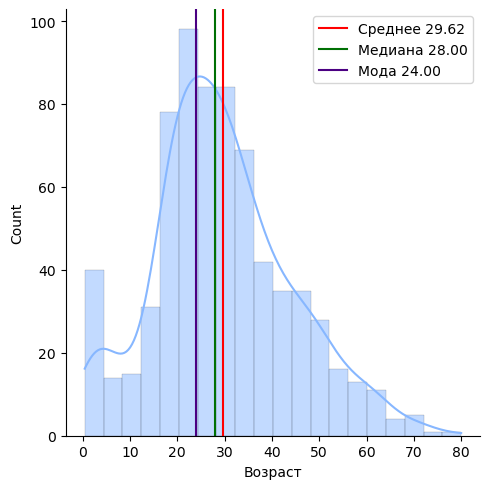

In [96]:
sns.displot(data = dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Возраст'].mean()):.2f}")
plt.axvline(dataset["Возраст"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Возраст'].median():.2f}")
plt.axvline(dataset["Возраст"].mode().iloc[0], ls="-", color="indigo", label=f"Мода {dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()

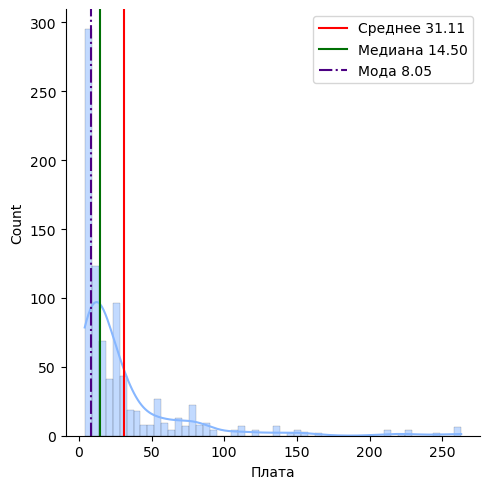

In [97]:
sns.displot(data = dataset, x = "Плата", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Плата"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Плата'].mean()):.2f}")
plt.axvline(dataset["Плата"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Плата'].median():.2f}")
plt.axvline(dataset["Плата"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Плата'].mode().iloc[0]:.2f}")
plt.legend()

<AxesSubplot:>

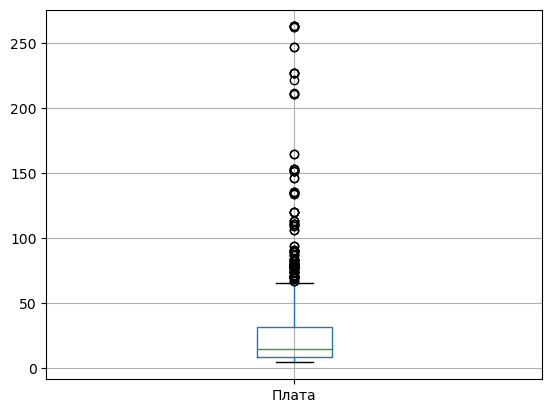

In [98]:
dataset.boxplot("Плата")

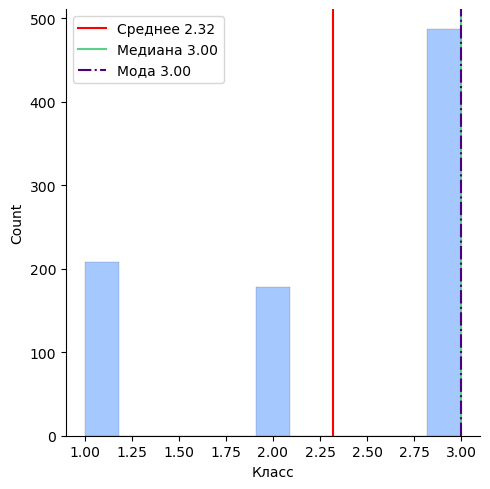

In [99]:
sns.displot(data = dataset, x = "Класс", color = "#87b7ff", linewidth = 0.1)
plt.axvline(dataset["Класс"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Класс'].mean()):.2f}")
plt.axvline(dataset["Класс"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Класс'].median():.2f}")
plt.axvline(dataset["Класс"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Класс'].mode().iloc[0]:.2f}")
plt.legend()

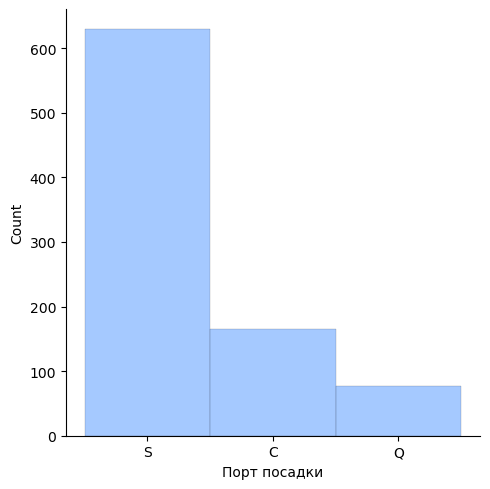

In [100]:
sns.displot(data = dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1)

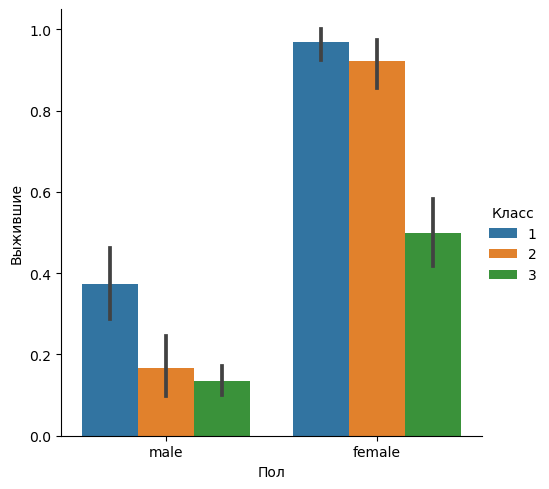

In [101]:
sns.catplot(data=dataset, x="Пол", y="Выжившие", hue="Класс", kind="bar")

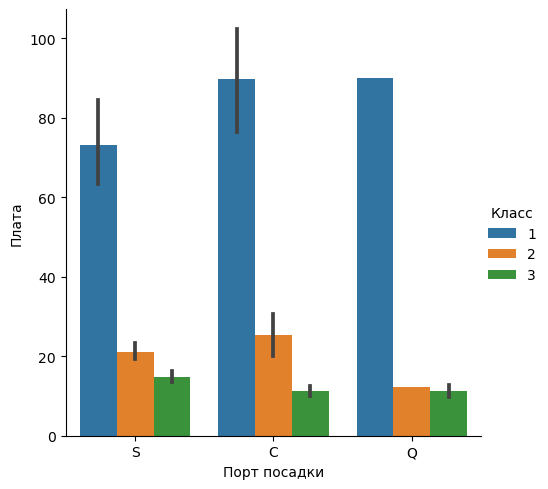

In [102]:
sns.catplot(data=dataset, x="Порт посадки", y="Плата", hue="Класс", kind="bar")

F:\anc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


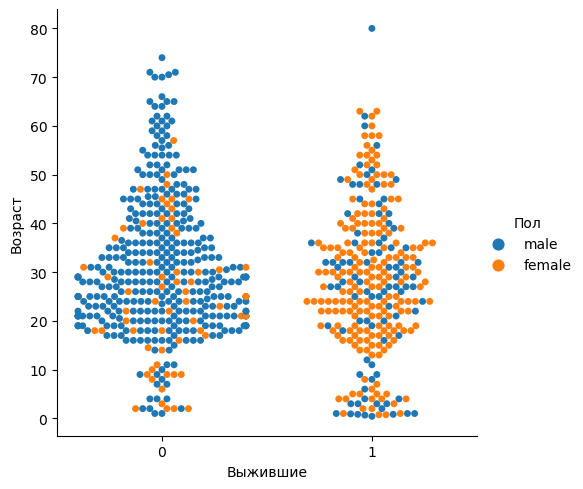

In [103]:
sns.catplot(data=dataset, x="Выжившие", y="Возраст", hue = "Пол", kind="swarm")

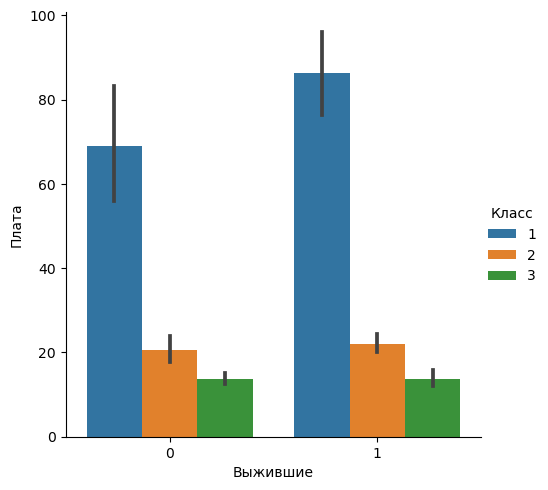

In [104]:
sns.catplot(data=dataset, x="Выжившие", y="Плата", hue="Класс", kind="bar")

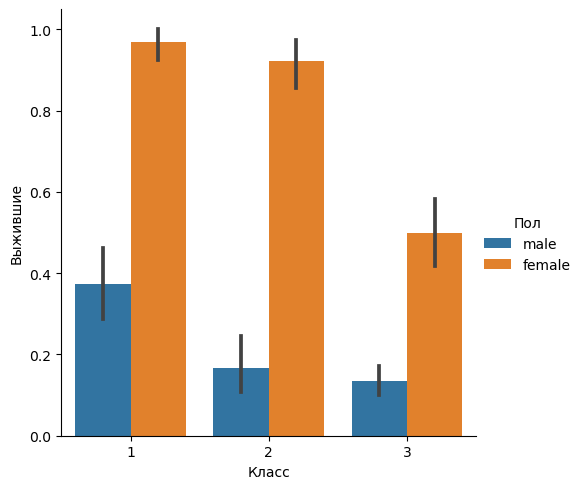

In [105]:
sns.catplot(data=dataset, x="Класс", y="Выжившие", hue="Пол", kind="bar")

<AxesSubplot:>

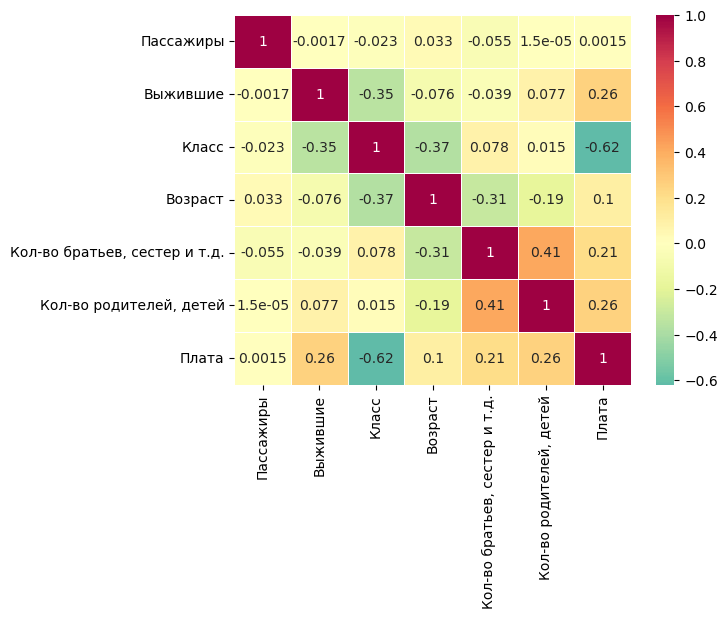

In [106]:
sns.heatmap(dataset.corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

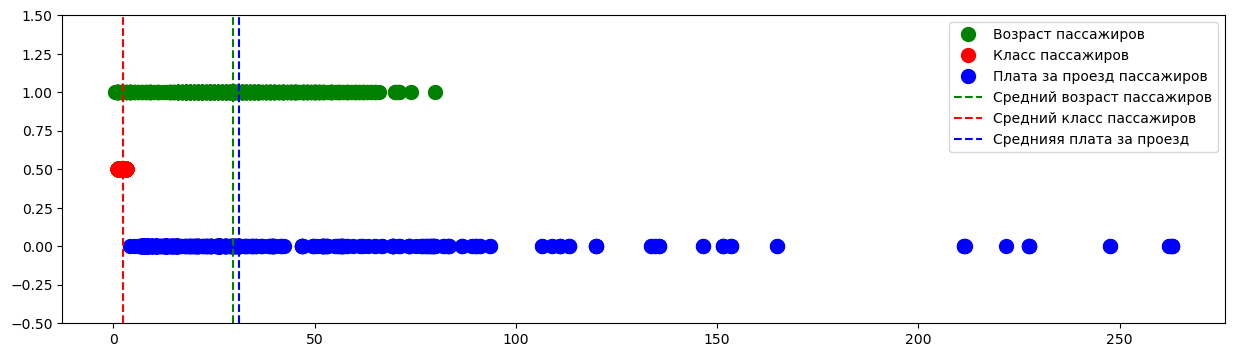

In [107]:
plt.figure(figsize=(15, 4))
plt.ylim(-0.5, 1.5)
plt.plot(dataset["Возраст"], [1 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="g", label="Возраст пассажиров")
plt.plot(dataset["Класс"], [0.5 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="r", label="Класс пассажиров")
plt.plot(dataset["Плата"], [0 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="b", label="Плата за проезд пассажиров")
plt.axvline(dataset["Возраст"].mean(), ls="--", color="g", label="Средний возраст пассажиров")
plt.axvline(dataset["Класс"].mean(), ls="--", color="r", label="Средний класс пассажиров")
plt.axvline(dataset["Плата"].mean(), ls="--", color="b", label="Среднияя плата за проезд")
plt.legend()

Отсечение 5 процентов помогло избавиться от данных предположительно являющихся ошибкой ввода и не повлияло в значительной степени на другие данные, кроме тех по которым они отсеивались.

Заполнение пропущенных данных

In [108]:
# до заполнения

dataset.describe()

new_dataset = deepcopy(dataset)

In [109]:
# заполнение пропущенных данных средними значениями

new_dataset.loc[new_dataset["Возраст"].isna(), "Возраст"] = new_dataset["Возраст"].median()
new_dataset.loc[new_dataset["Порт посадки"].isna(), "Порт посадки"] = new_dataset["Порт посадки"].mode().iloc[0]

# нет смысла заполнять каюты, так как они почти у всех отличаются

In [110]:
new_dataset.describe()

Пассажиры    Выжившие       Класс     Возраст  \
count  873.000000  873.000000  873.000000  873.000000   
mean   444.402062    0.387171    2.319588   29.307182   
std    257.858537    0.487382    0.833526   13.111389   
min      1.000000    0.000000    1.000000    0.420000   
25%    220.000000    0.000000    2.000000   22.000000   
50%    444.000000    0.000000    3.000000   28.000000   
75%    666.000000    1.000000    3.000000   35.000000   
max    891.000000    1.000000    3.000000   80.000000   

       Кол-во братьев, сестер и т.д.  Кол-во родителей, детей       Плата  
count                     873.000000               873.000000  873.000000  
mean                        0.533792                 0.388316   31.107631  
std                         1.111477                 0.812291   41.331513  
min                         0.000000                 0.000000    4.012500  
25%                         0.000000                 0.000000    7.925000  
50%                         0.000000                 0.000000   14.500000  
75%                         1.000000                 0.000000   31.275000  
max                         8.000000                 6.000000  263.000000

In [111]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Пассажиры                      873 non-null    int64  
 1   Выжившие                       873 non-null    int64  
 2   Класс                          873 non-null    int64  
 3   Имя                            873 non-null    object 
 4   Пол                            873 non-null    object 
 5   Возраст                        873 non-null    float64
 6   Кол-во братьев, сестер и т.д.  873 non-null    int64  
 7   Кол-во родителей, детей        873 non-null    int64  
 8   Номер билета                   873 non-null    object 
 9   Плата                          873 non-null    float64
 10  Каюта                          199 non-null    object 
 11  Порт посадки                   873 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1

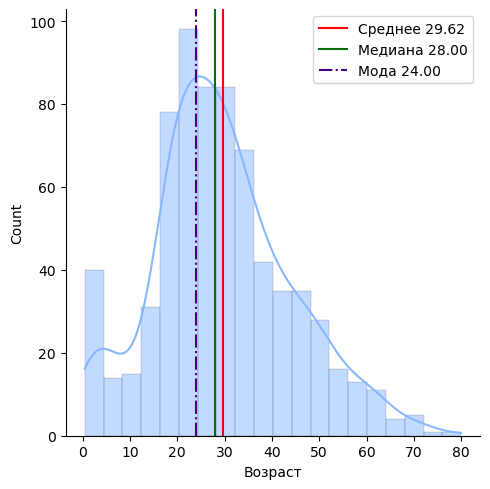

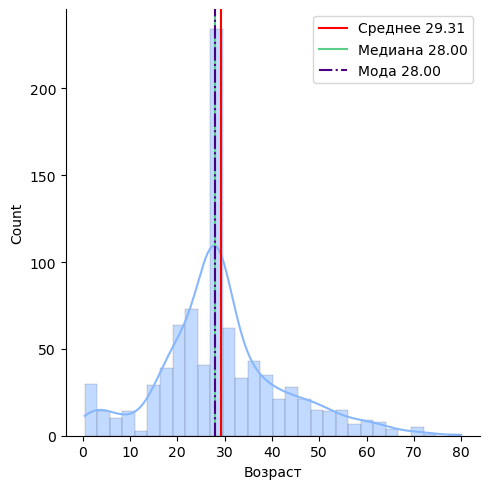

In [112]:
# старые данные
sns.displot(data = dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Возраст'].mean()):.2f}")
plt.axvline(dataset["Возраст"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Возраст'].median():.2f}")
plt.axvline(dataset["Возраст"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()
# новые данные
sns.displot(data = new_dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(new_dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(new_dataset['Возраст'].mean()):.2f}")
plt.axvline(new_dataset["Возраст"].median(), ls="-", color="#59cf88", label=f"Медиана {new_dataset['Возраст'].median():.2f}")
plt.axvline(new_dataset["Возраст"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {new_dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()

<AxesSubplot:>

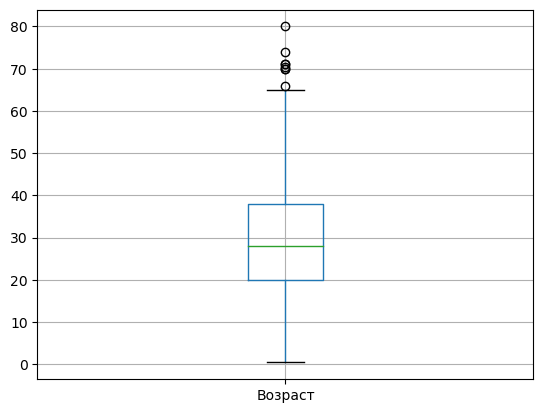

In [113]:
dataset.boxplot("Возраст")

<AxesSubplot:>

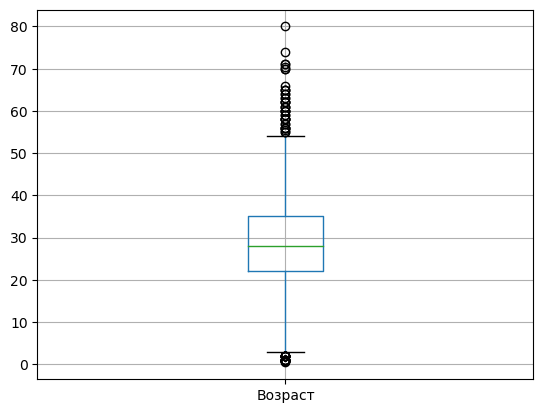

In [114]:
new_dataset.boxplot("Возраст")

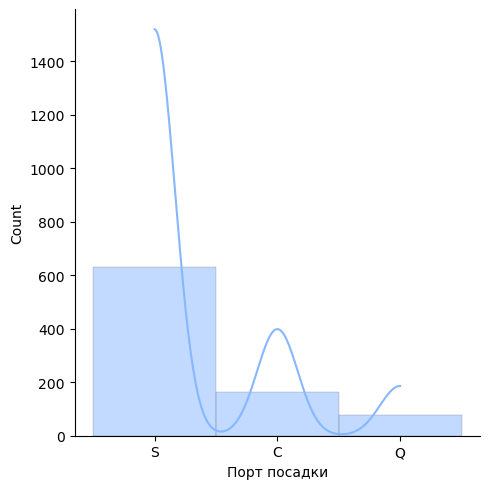

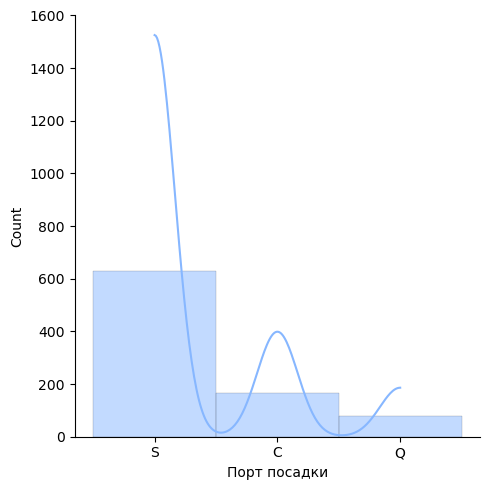

In [115]:
# старые данные
sns.displot(data = dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1, kde=True)
# новые данные
sns.displot(data = new_dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1, kde=True)

Так как сильно меняется внешний вид графика (нормальность) или не меняется вовсе, а средние показатели меняются незначительно, то заполнение пропущенных данных не имеет смысла.

Анализ данных (если это не надо, то в отчёт не вставлять)

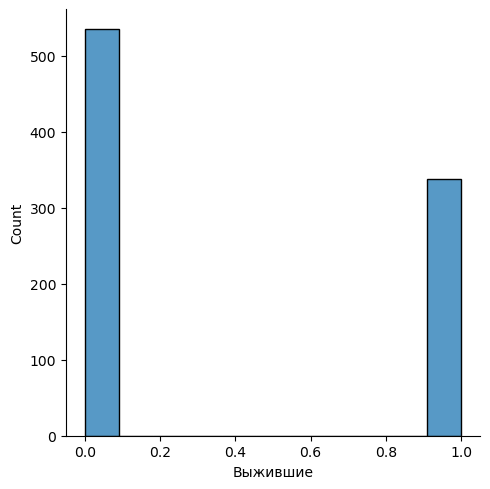

In [116]:
sns.displot(data = dataset, x = "Выжившие")

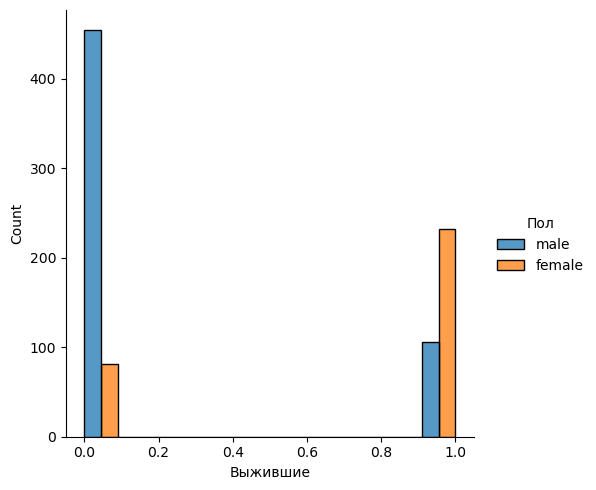

In [117]:
sns.displot(data = dataset, x = "Выжившие", hue = "Пол", multiple="dodge")


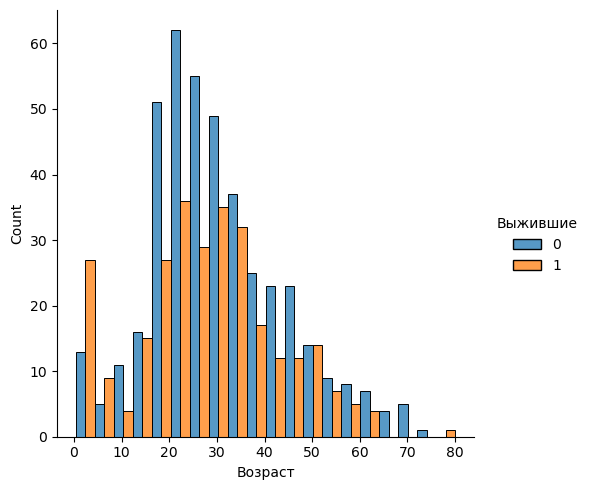

In [118]:
sns.displot(data = dataset, x = "Возраст", hue = "Выжившие", multiple="dodge")

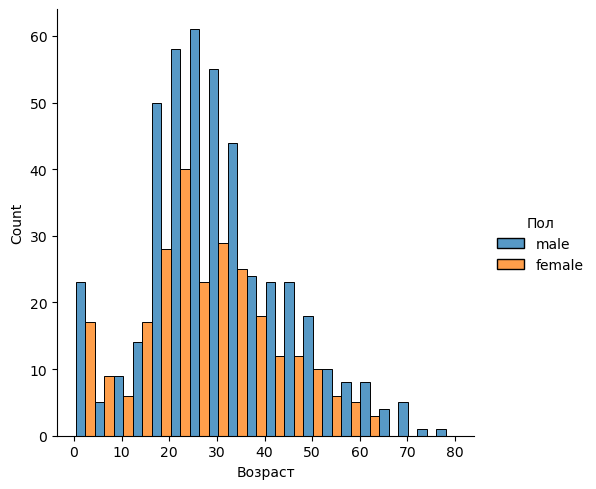

In [119]:
sns.displot(data = dataset, x = "Возраст", hue = "Пол", multiple="dodge")

Text(0.5, 1.0, 'Выжили')

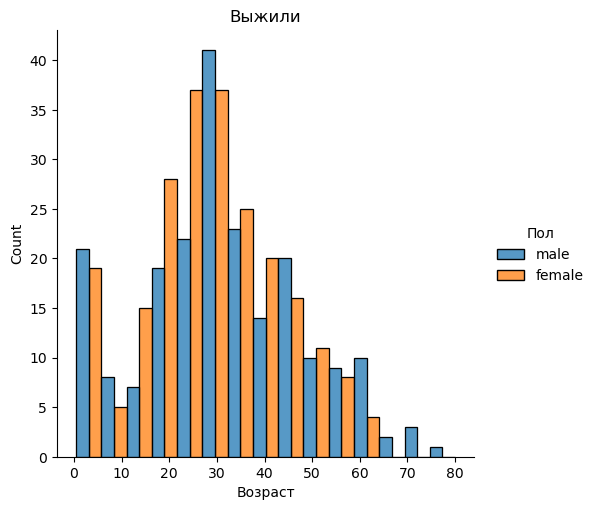

In [120]:
sns.displot(data = dataset[(dataset == 1).any(axis=1)], x = "Возраст", hue = "Пол", multiple="dodge")
plt.title("Выжили")

Text(0.5, 1.0, 'Погибли')

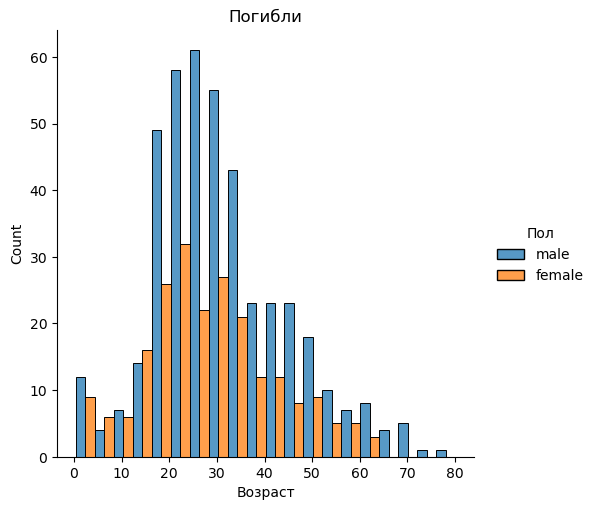

In [121]:
sns.displot(data = dataset[(dataset == 0).any(axis=1)], x = "Возраст", hue = "Пол", multiple="dodge")
plt.title("Погибли")

 Тесты

Тесты на нормальность

Выжившие:
  statistic: 0.6177963018417358
  p value: 4.222518649565328e-40
Класс:
  statistic: 0.7148730754852295
  p value: 4.7223774390704644e-36
Возраст:
  statistic: 0.9804993271827698
  p value: 4.516706297863493e-08
Кол-во братьев, сестер и т.д.:
  statistic: 0.5180689692497253
  p value: 1.8357009882655104e-43
Кол-во родителей, детей:
  statistic: 0.5373575687408447
  p value: 7.342803953062041e-43
Плата:
  statistic: 0.5999830961227417
  p value: 9.46184749081403e-41


<AxesSubplot:xlabel='Номер', ylabel='Значения'>

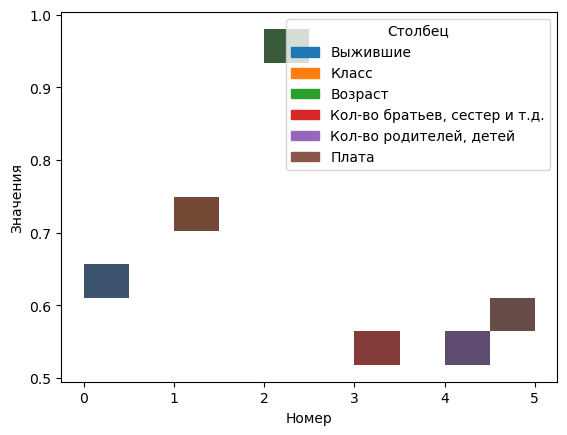

In [122]:
# Тест Шапиро-Вилка
from scipy.stats import shapiro
lst1 = []
lst2 = []
for name in dataset.columns[[1,2,5,6,7,9]].values:
    stat = shapiro(dataset[name].loc[dataset[name].isna() == False])
    lst1 = lst1 + [stat.statistic]
    lst2 = lst2 + [stat.pvalue]
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    print(f"  p value: {stat.pvalue}")    
lst1 = zip(lst1, list(dataset.columns[[1,2,5,6,7,9]].values), range(len(lst1)))
sns.histplot(data = pd.DataFrame(lst1, columns=["Значения","Столбец", "Номер"]), x = "Номер", bins = 10, y = "Значения", hue = "Столбец")

In [123]:
# Тест д'Агостино на K ^ 2
from scipy.stats import normaltest
for name in dataset.columns[[1,2,5,6,7,9]].values:
    stat = normaltest(dataset[name].loc[dataset[name].isna() == False])
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    print(f"  p value: {stat.pvalue}")

Выжившие:
  statistic: 3944.671752590349
  p value: 0.0
Класс:
  statistic: 999.2214688008523
  p value: 1.0515137359615956e-217
Возраст:
  statistic: 18.87482528580366
  p value: 7.968631901686796e-05
Кол-во братьев, сестер и т.д.:
  statistic: 702.3119641050046
  p value: 3.125321555287293e-153
Кол-во родителей, детей:
  statistic: 526.2352679053552
  p value: 5.363687696726574e-115
Плата:
  statistic: 606.6346047328245
  p value: 1.8662478331552754e-132


Выжившие:
  statistic: 167.36044850811186
  critical_values: [0.573 0.653 0.783 0.914 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Класс:
  statistic: 109.68148774209726
  critical_values: [0.573 0.653 0.783 0.914 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Возраст:
  statistic: 4.055010792804524
  critical_values: [0.573 0.652 0.783 0.913 1.086]
  significance_level: [15.  10.   5.   2.5  1. ]
Кол-во братьев, сестер и т.д.:
  statistic: 142.19795511925236
  critical_values: [0.573 0.653 0.783 0.914 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Кол-во родителей, детей:
  statistic: 170.11923962269157
  critical_values: [0.573 0.653 0.783 0.914 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Плата:
  statistic: 108.78168951414557
  critical_values: [0.573 0.653 0.783 0.914 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
mean=50.598 stdv=10.079
AndersonResult(statistic=0.18097695613923293, critical_values=array([0.555, 0.632, 0.759, 0.885,

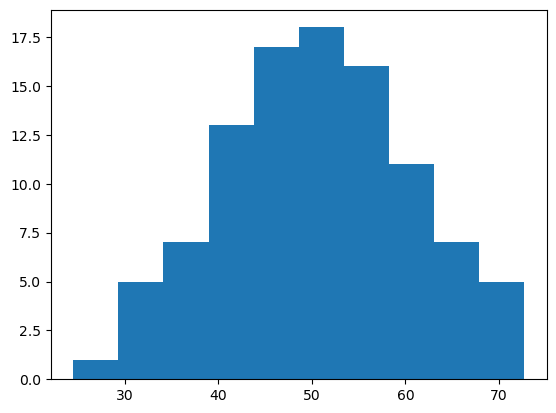

In [124]:
# Тест Андерсона-Дарлинга
from scipy.stats import anderson
for name in dataset.columns[[1,2,5,6,7,9]].values:
    stat = anderson(dataset[name].loc[dataset[name].isna() == False])
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    print(f"  critical_values: {stat.critical_values}")  
    print(f"  significance_level: {stat.significance_level}")  
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(2)
# generate univariate observations
seed(0)
data = 10 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))
plt.hist(data)
print(anderson(data))


Корреляционные тесты

Выжившие - Выжившие:
  statistic: 0.9999999999999997
  p value: 0.0
Выжившие - Класс:
  statistic: -0.3472742553980279
  p value: 3.8098680449383053e-26
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: -0.03899768333319465
  p value: 0.24971789817301002
Выжившие - Кол-во родителей, детей:
  statistic: 0.07748391835785609
  p value: 0.02204759525664433
Выжившие - Плата:
  statistic: 0.25617195734545206
  p value: 1.5088070631439927e-14
Класс - Выжившие:
  statistic: -0.3472742553980279
  p value: 3.8098680449383053e-26
Класс - Класс:
  statistic: 1.0
  p value: 0.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 0.07807314131141169
  p value: 0.021054217580681475
Класс - Кол-во родителей, детей:
  statistic: 0.014667638893571585
  p value: 0.6651740156140046
Класс - Плата:
  statistic: -0.6193088696096007
  p value: 1.385547537583988e-93
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: -0.03899768333319465
  p value: 0.24971789817301002
Кол-во братьев, сестер и т.д. - Кл

<AxesSubplot:>

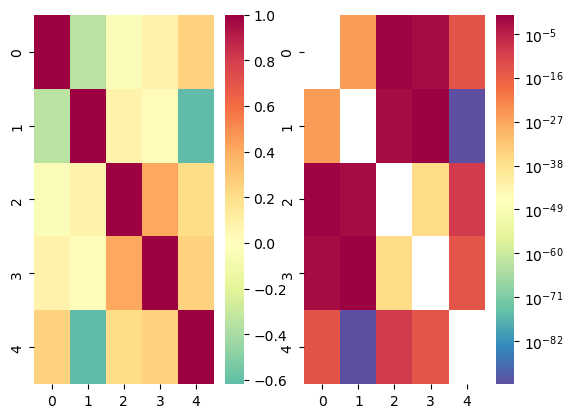

In [125]:
# Коэффициент корреляции Пирсона
from scipy.stats import pearsonr
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = pearsonr(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Выжившие:
  statistic: 1.0
  p value: 0.0
Выжившие - Класс:
  statistic: -0.34942208572366057
  p value: 1.8037428989348152e-26
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 0.08481823798758169
  p value: 0.012175503363196356
Выжившие - Кол-во родителей, детей:
  statistic: 0.13305923843104955
  p value: 8.034845516639506e-05
Выжившие - Плата:
  statistic: 0.3094124270237272
  p value: 8.003083976616531e-21
Класс - Выжившие:
  statistic: -0.34942208572366057
  p value: 1.8037428989348152e-26
Класс - Класс:
  statistic: 1.0
  p value: 0.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: -0.052281137882586926
  p value: 0.12269231446403299
Класс - Кол-во родителей, детей:
  statistic: -0.02729858042977121
  p value: 0.4204885332935674
Класс - Плата:
  statistic: -0.7241396458304988
  p value: 1.0447597158135154e-142
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 0.08481823798758167
  p value: 0.012175503363196383
Кол-во братьев, сестер и т.д. - Класс:
  sta

<AxesSubplot:>

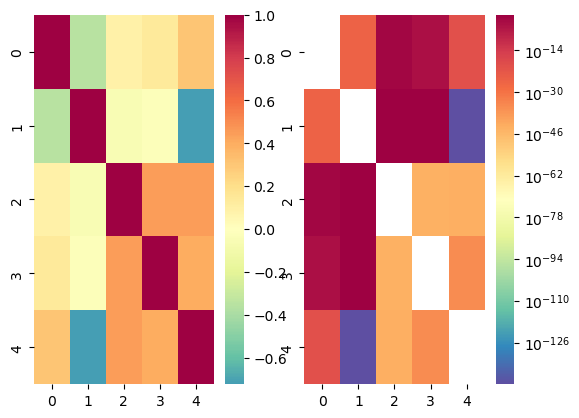

In [126]:
# Ранговая корреляция Спирмена
from scipy.stats import spearmanr
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = spearmanr(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.correlation
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.correlation}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Выжившие:
  statistic: 1.0
  p value: 1.1989224291156365e-191
Выжившие - Класс:
  statistic: -0.3329990983451971
  p value: 5.8238885863871115e-25
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 0.08193458197895012
  p value: 0.012257173451736264
Выжившие - Кол-во родителей, детей:
  statistic: 0.128820449375126
  p value: 8.523168848221488e-05
Выжившие - Плата:
  statistic: 0.2544855669104447
  p value: 6.430412449954199e-20
Класс - Выжившие:
  statistic: -0.3329990983451971
  p value: 5.8238885863871115e-25
Класс - Класс:
  statistic: 0.9999999999999999
  p value: 6.805481458052724e-232
Класс - Кол-во братьев, сестер и т.д.:
  statistic: -0.048074838510740216
  p value: 0.12305858871884143
Класс - Кол-во родителей, детей:
  statistic: -0.025176163577843184
  p value: 0.42037457274888035
Класс - Плата:
  statistic: -0.6046821913429422
  p value: 7.33072455872422e-115
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 0.08193458197895012
  p value: 0.0122571734517

<AxesSubplot:>

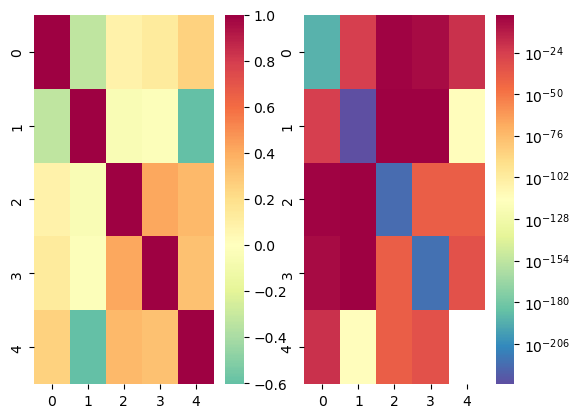

In [127]:
# Ранговая корреляция Кендалла
from scipy.stats import kendalltau
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = kendalltau(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.correlation
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.correlation}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

In [128]:
# Тест хи-квадрат
from scipy.stats import chi2_contingency
from matplotlib.colors import LogNorm
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = chi2_contingency(pd.crosstab(dataset[name], dataset[other_name]))
        print(f"{name} - {other_name}:")
        print(f"  {stat}")

Выжившие - Выжившие:
  (868.7904708285595, 5.977648555313468e-191, 1, array([[327.86368843, 207.13631157],
       [207.13631157, 130.86368843]]))
Выжившие - Класс:
  (106.60208678974134, 7.106421678199163e-24, 2, array([[127.46849943, 109.0836197 , 298.44788087],
       [ 80.53150057,  68.9163803 , 188.55211913]]))
Выжившие - Кол-во братьев, сестер и т.д.:
  (36.31561054488209, 2.3933629598938927e-06, 6, array([[361.56930126, 128.08132875,  17.15922108,   9.80526919,
         11.03092784,   3.06414662,   4.28980527],
       [228.43069874,  80.91867125,  10.84077892,   6.19473081,
          6.96907216,   1.93585338,   2.71019473]]))
Выжившие - Кол-во родителей, детей:
  (26.02574131531371, 0.00022019751712822855, 6, array([[4.05080183e+02, 7.17010309e+01, 4.90263459e+01, 3.06414662e+00,
        2.45131730e+00, 3.06414662e+00, 6.12829324e-01],
       [2.55919817e+02, 4.52989691e+01, 3.09736541e+01, 1.93585338e+00,
        1.54868270e+00, 1.93585338e+00, 3.87170676e-01]]))
Выжившие - Плат

Параметрические статистические проверки гипотез

Выжившие - Выжившие:
  statistic: 0.0
  p value: 1.0
Выжившие - Класс:
  statistic: -59.13281844801343
  p value: 0.0
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: -3.5695438671151734
  p value: 0.00036728480713247273
Выжившие - Кол-во родителей, детей:
  statistic: -0.03572808526669145
  p value: 0.9715032647745067
Выжившие - Плата:
  statistic: -21.959545250097705
  p value: 1.4496355826256965e-94
Класс - Выжившие:
  statistic: 59.13281844801343
  p value: 0.0
Класс - Класс:
  statistic: 0.0
  p value: 1.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 37.97902383594534
  p value: 1.595303622925873e-230
Класс - Кол-во родителей, детей:
  statistic: 49.02840103822227
  p value: 0.0
Класс - Плата:
  statistic: -20.575465429307467
  p value: 2.1534704366648713e-84
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 3.5695438671151734
  p value: 0.00036728480713247273
Кол-во братьев, сестер и т.д. - Класс:
  statistic: -37.97902383594534
  p value: 1.595303622925873e-230

<AxesSubplot:>

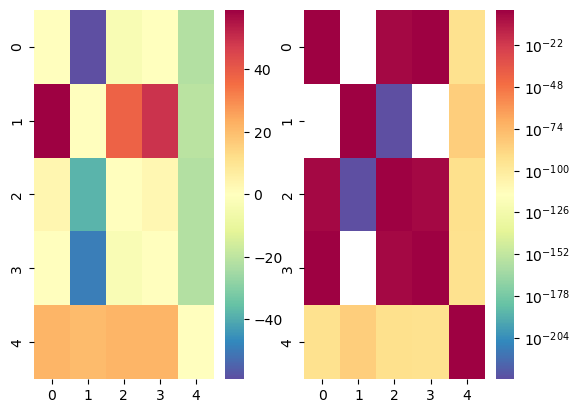

In [129]:
# т-тест Стьюдента
from scipy.stats import ttest_ind
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = ttest_ind(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Выжившие:
  statistic: nan
  p value: nan
Выжившие - Класс:
  statistic: -51.810244226283125
  p value: 2.100362549758625e-268
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: -3.519422944683674
  p value: 0.0004548676295460003
Выжившие - Кол-во родителей, детей:
  statistic: -0.03701584753351321
  p value: 0.9704808418963454
Выжившие - Плата:
  statistic: -22.026173158363427
  p value: 7.819282191379703e-86
Класс - Выжившие:
  statistic: 51.810244226283125
  p value: 2.100362549758625e-268
Класс - Класс:
  statistic: nan
  p value: nan
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 39.487601714885706
  p value: 2.3420606062686817e-196
Класс - Кол-во родителей, детей:
  statistic: 49.39184857054269
  p value: 6.7453558849977005e-255
Класс - Плата:
  statistic: -20.323305091899567
  p value: 1.7988270385994383e-75
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 3.519422944683674
  p value: 0.0004548676295460003
Кол-во братьев, сестер и т.д. - Класс:
  statis

<AxesSubplot:>

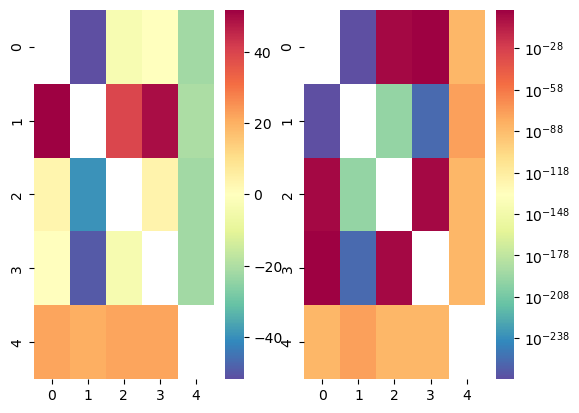

In [130]:
# Парный т-тест Стьюдента
from scipy.stats import ttest_rel
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = ttest_rel(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Непараметрические статистические проверки гипотез

Выжившие - Выжившие:
  statistic: 381064.5
  p value: 1.0
Выжившие - Класс:
  statistic: 35152.0
  p value: 1.7412827544531313e-257
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 392566.0
  p value: 0.19244001082285345
Выжившие - Кол-во родителей, детей:
  statistic: 420008.5
  p value: 5.41290316109088e-06
Выжившие - Плата:
  statistic: 0.0
  p value: 3.202644579412969e-297
Класс - Выжившие:
  statistic: 726977.0
  p value: 1.7412827544531313e-257
Класс - Класс:
  statistic: 381064.5
  p value: 1.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 695815.0
  p value: 1.4956631715792668e-212
Класс - Кол-во родителей, детей:
  statistic: 714323.5
  p value: 3.097342261708785e-240
Класс - Плата:
  statistic: 0.0
  p value: 1.0143548293136497e-293
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 369563.0
  p value: 0.19244001082285345
Кол-во братьев, сестер и т.д. - Класс:
  statistic: 66314.0
  p value: 1.4956631715792668e-212
Кол-во братьев, сестер и т.д. - Кол-во братье

<AxesSubplot:>

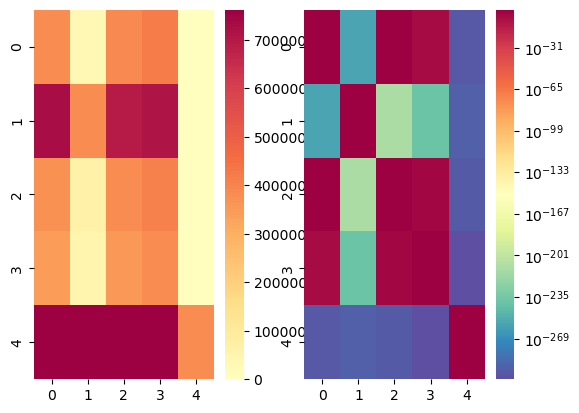

In [131]:
# U-тест Манна-Уитни
from scipy.stats import mannwhitneyu
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = mannwhitneyu(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Класс:
  statistic: 0.0
  p value: 1.0124671354865968e-127
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 32651.0
  p value: 0.12817524994355356
Выжившие - Кол-во родителей, детей:
  statistic: 34371.0
  p value: 0.4595715809991464
Выжившие - Плата:
  statistic: 0.0
  p value: 1.6800763461468135e-144
Класс - Выжившие:
  statistic: 0.0
  p value: 1.0124671354865968e-127
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 10749.0
  p value: 5.254321043650744e-116
Класс - Кол-во родителей, детей:
  statistic: 6381.5
  p value: 4.4063454835285183e-131
Класс - Плата:
  statistic: 0.0
  p value: 1.6498136491355047e-144
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 32651.0
  p value: 0.12817524994355356
Кол-во братьев, сестер и т.д. - Класс:
  statistic: 10749.0
  p value: 5.254321043650744e-116
Кол-во братьев, сестер и т.д. - Кол-во родителей, детей:
  statistic: 15853.5
  p value: 6.693303588081062e-05
Кол-во братьев, сестер и т.д. - Плата:
  statistic: 0.0
  p v

<AxesSubplot:>

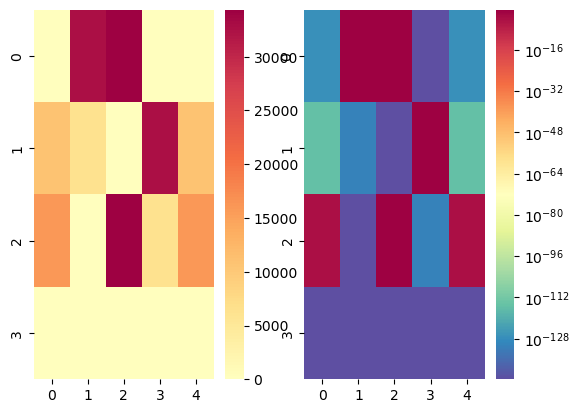

In [132]:
# Тест Уилкоксона со знаком
from scipy.stats import wilcoxon
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(4)]
p_mat = [[0 for _ in range(5)] for _ in range(4)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        if(name != other_name):
            stat = wilcoxon(dataset[name], dataset[other_name])
            stat_mat[i//5][i%5] = stat.statistic
            p_mat[i//5][i%5] = stat.pvalue
            i += 1
            print(f"{name} - {other_name}:")
            print(f"  statistic: {stat.statistic}")
            print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

<AxesSubplot:>

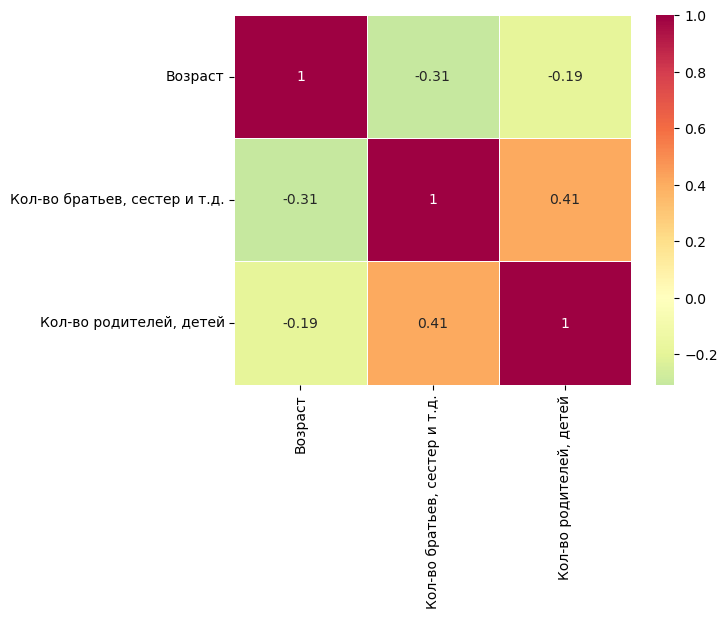

In [133]:
sns.heatmap(data = dataset[dataset.columns[[5,6,7]]].corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

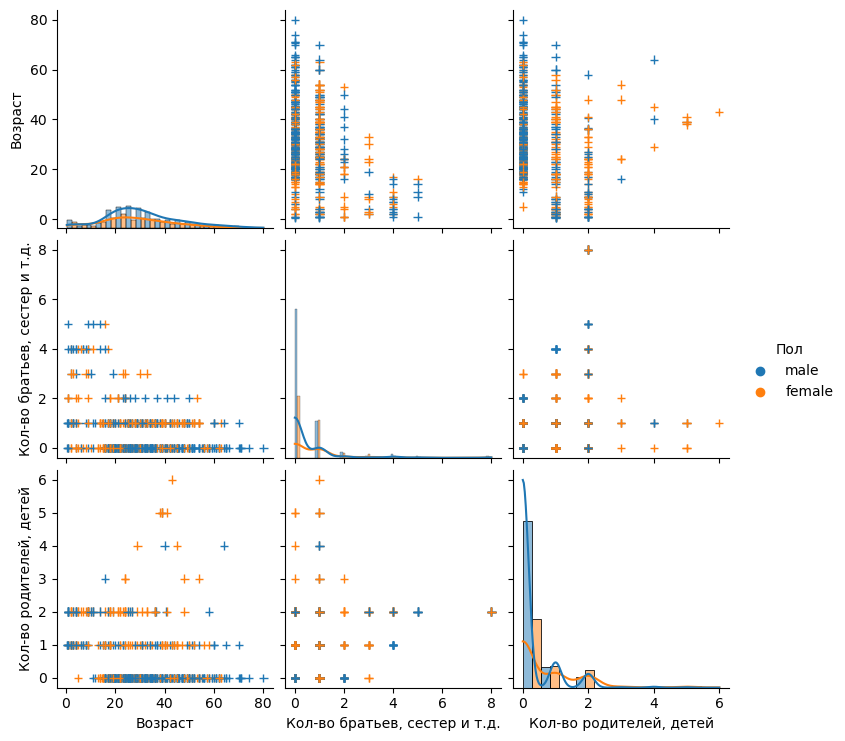

In [134]:
sns.pairplot(data=dataset, vars=dataset.columns[[5,6,7]], hue="Пол",plot_kws=dict(marker="+", linewidth=1), diag_kind="hist", diag_kws=dict(multiple="dodge", kde=True))

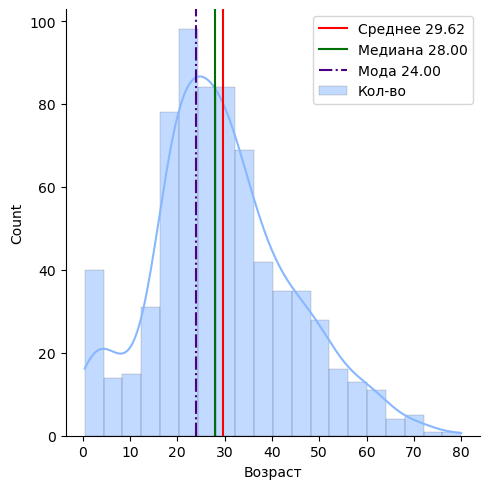

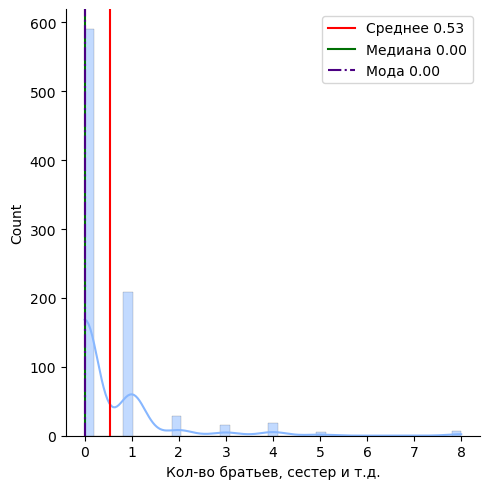

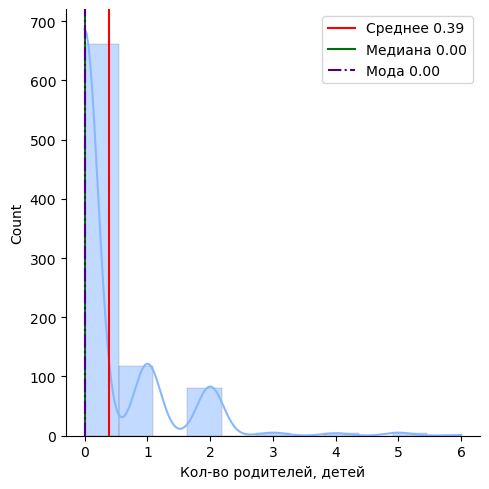

In [135]:

sns.displot(data = dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True, label = "Кол-во")
plt.axvline(dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Возраст'].mean()):.2f}")
plt.axvline(dataset["Возраст"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Возраст'].median():.2f}")
plt.axvline(dataset["Возраст"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()
sns.displot(data = dataset, x = "Кол-во братьев, сестер и т.д.", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Кол-во братьев, сестер и т.д."].mean(), ls="-", color="r", label=f"Среднее {(dataset['Кол-во братьев, сестер и т.д.'].mean()):.2f}")
plt.axvline(dataset["Кол-во братьев, сестер и т.д."].median(), ls="-", color="#007004", label=f"Медиана {dataset['Кол-во братьев, сестер и т.д.'].median():.2f}")
plt.axvline(dataset["Кол-во братьев, сестер и т.д."].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Кол-во братьев, сестер и т.д.'].mode().iloc[0]:.2f}")
plt.legend()
sns.displot(data = dataset, x = "Кол-во родителей, детей", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Кол-во родителей, детей"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Кол-во родителей, детей'].mean()):.2f}")
plt.axvline(dataset["Кол-во родителей, детей"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Кол-во родителей, детей'].median():.2f}")
plt.axvline(dataset["Кол-во родителей, детей"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Кол-во родителей, детей'].mode().iloc[0]:.2f}")
plt.legend()

In [136]:
print(dataset["Плата"].describe())
print(dataset["Кол-во братьев, сестер и т.д."].describe())
print(dataset["Кол-во родителей, детей"].describe())

count    873.000000
mean      31.107631
std       41.331513
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      263.000000
Name: Плата, dtype: float64
count    873.000000
mean       0.533792
std        1.111477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: Кол-во братьев, сестер и т.д., dtype: float64
count    873.000000
mean       0.388316
std        0.812291
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Кол-во родителей, детей, dtype: float64


Возраст:
  statistic: 20.330545061328735
"0.47" "0.632" "0.751" "0.87" "1.03" 
  significance_level: [25.  10.   5.   2.5  1. ]
Кол-во братьев, сестер и т.д.:
  statistic: 183.58837576054748
"0.471" "0.633" "0.752" "0.871" "1.031" 
  significance_level: [25.  10.   5.   2.5  1. ]
Кол-во родителей, детей:
  statistic: 171.25703135409685
"0.471" "0.633" "0.752" "0.871" "1.031" 
  significance_level: [25.  10.   5.   2.5  1. ]
Изменнённый возраст:
  statistic: 8.277206127645286
"0.573" "0.652" "0.782" "0.913" "1.085" 
  significance_level: [15.  10.   5.   2.5  1. ]


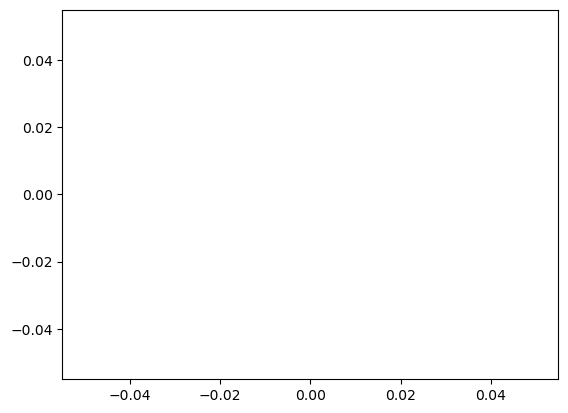

In [137]:
# Тест Андерсона-Дарлинга
from scipy.stats import anderson
for name in dataset.columns[[5,6,7]].values:
    stat = anderson(dataset[name].loc[dataset[name].isna() == False], dist = "gumbel")
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    for x in stat.critical_values:
        if x < stat.statistic:
            print(f"\x1b[31m\"{x}\"\x1b[0m", end = ' ')
        else:
            print(f"\x1b[32m\"{x}\"\x1b[0m", end = ' ')
    print(f"\n  significance_level: {stat.significance_level}")
temp_ds = filtered_dataset = dataset[ dataset["Возраст"] > 5]
plt.plot(data = temp_ds, color = "#87b7ff", linewidth = 0.1, kde=True)
stat = anderson(temp_ds["Возраст"].loc[temp_ds["Возраст"].isna() == False])
print(f"Изменнённый возраст:")
print(f"  statistic: {stat.statistic}")
for x in stat.critical_values:
    if x < stat.statistic:
     print(f"\x1b[31m\"{x}\"\x1b[0m", end = ' ')
    else:
     print(f"\x1b[32m\"{x}\"\x1b[0m", end = ' ')
    
print(f"\n  significance_level: {stat.significance_level}")

[]

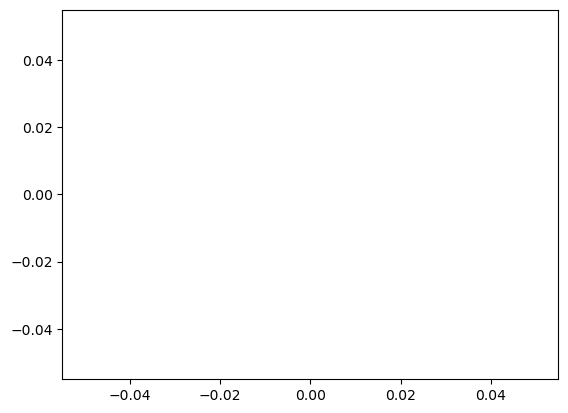

In [138]:
plt.plot(data = temp_ds, color = "#87b7ff", linewidth = 0.1, kde=True)

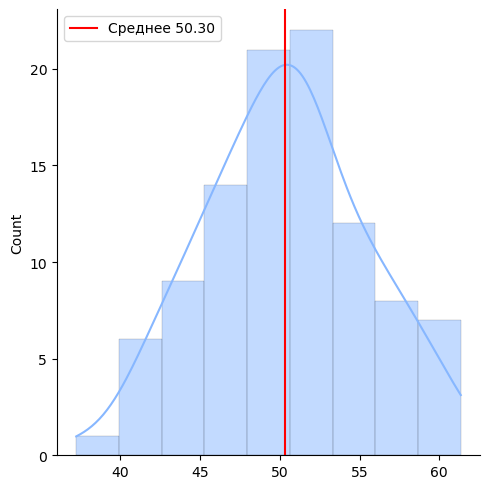

In [139]:
# seed the random number generator
seed(0)
# generate univariate observations
from random import randint
data = 5 * randn(100) + 50
# histogram plot
sns.displot(data = data, color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(data.mean(), ls="-", color="r", label=f"Среднее {(data.mean()):.2f}")
plt.legend()

In [140]:
stat = anderson(data)
print(f"Случайные данные:")
print(f"  statistic: {stat.statistic}")
for x in stat.critical_values:
    if x < stat.statistic:
     print(f"\x1b[31m\"{x}\"\x1b[0m", end = ' ')
    else:
     print(f"\x1b[32m\"{x}\"\x1b[0m", end = ' ')
    
print(f"\n  significance_level: {stat.significance_level}")

Случайные данные:
  statistic: 0.18097695613926135
"0.555" "0.632" "0.759" "0.885" "1.053" 
  significance_level: [15.  10.   5.   2.5  1. ]


In [141]:

pd.DataFrame(data,columns=['Данные']).describe()

Данные
count  100.000000
mean    50.299040
std      5.064799
min     37.235051
25%     46.780717
50%     50.470481
75%     53.685387
max     61.348773

Случайные данные с погрешностью:
  statistic: 1.4032579041008262
"0.555" "0.632" "0.759" "0.885" "1.053" 
  significance_level: [15.  10.   5.   2.5  1. ]


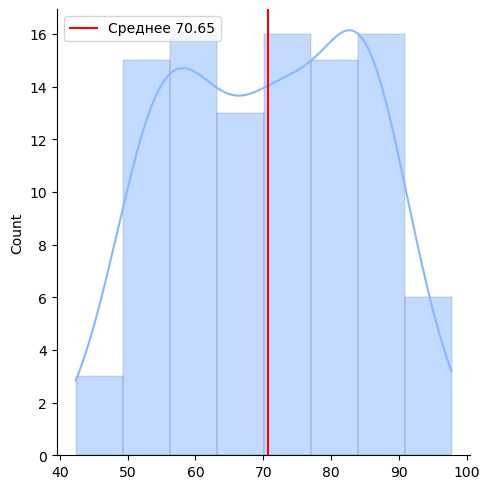

In [142]:
# seed the random number generator
seed(0)
# generate univariate observations
from random import randint
data = 5 * randn(100) + 50
data = np.array([x + randint(0,40) for x in data])
# histogram plot
sns.displot(data = data, color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(data.mean(), ls="-", color="r", label=f"Среднее {(data.mean()):.2f}")
plt.legend()
stat = anderson(data)
print(f"Случайные данные с погрешностью:")
print(f"  statistic: {stat.statistic}")
for x in stat.critical_values:
    if x < stat.statistic:
     print(f"\x1b[31m\"{x}\"\x1b[0m", end = ' ')
    else:
     print(f"\x1b[32m\"{x}\"\x1b[0m", end = ' ')
    
print(f"\n  significance_level: {stat.significance_level}")

In [143]:
# Тест Андерсона-Дарлинга
from scipy.stats import anderson
for name in dataset.columns[[5,6,7]].values:
    stat = anderson([-x for x in dataset[name].loc[dataset[name].isna() == False]], dist = "expon")
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    for x in stat.critical_values:
        if x < stat.statistic:
            print(f"\x1b[31m\"{x}\"\x1b[0m", end = ' ')
        else:
            print(f"\x1b[32m\"{x}\"\x1b[0m", end = ' ')
    print(f"\n  significance_level: {stat.significance_level}")

Возраст:
  statistic: 830.5516926936539
"0.921" "1.077" "1.34" "1.605" "1.955" 
  significance_level: [15.  10.   5.   2.5  1. ]
Кол-во братьев, сестер и т.д.:
  statistic: inf
"0.921" "1.077" "1.34" "1.605" "1.956" 
  significance_level: [15.  10.   5.   2.5  1. ]
Кол-во родителей, детей:
  statistic: inf
"0.921" "1.077" "1.34" "1.605" "1.956" 
  significance_level: [15.  10.   5.   2.5  1. ]


In [144]:
pd.DataFrame(data,columns=['Данные']).describe()

Данные
count  100.000000
mean    70.649040
std     13.667318
min     42.368587
25%     58.481607
50%     71.095837
75%     83.223556
max     97.753877